[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slahiri/LendingClubCaseStudy/blob/master/Siddhartha_Lahiri.ipynb)

# Lending Club Case Study

### Data Understanding Domain


#### Important Columns
The given columns are leading attributes, or **predictors**. These attributes are available at the time of the loan application and strongly helps in **prediction** of loan pass or rejection. Key attributes *Some of these columns may get dropped due to empty data in the dataset*
* **Customer Demographics**
  * Annual Income (annual_inc) - higher the income, more chances of loan pass
  * Home Ownership (home_ownership) - if customer home ownership owned/rented/mortgages has higher impact on loan repayment.
  * Employment Length (emp_length) - Higher tenure makes customer more financial stable, thus higher chances of loan repay.
  * Debt to Income (dti) - Ther loawer loan debt makes higher chances of loan repayment.
  * State (addr_state) - Location of the customer. Can be used to create a generic demographic analysis. There could be higher delinquency or defaulters demographicaly. 
* **Loan Attributes**
  * Loan Ammount (loan_amt) 
  * Grade (grade)
  * Term (term)
  * Loan Date (issue_date)
  * Purpose of Loan (purpose)
  * Verification Status (verification_status)
  * Interest Rate (int_rate)
  * Installment (installment)
  * Public Records (public_rec) - This value gives idea how much risk is that the customer will default on loan.
  * Public Records Bankruptcy  (public_rec_bankruptcy) - These records also helps to find the loan default probability.
  

#### Ignored Columns
* The following types of columns will be ignored in the analysis. This is a generic categorization of the columns which will be ignored in our approach and not the full list.
   * **Customer Behaviour Columns** - Columns which describes customer behaviour will not contribute to the analysis. The current analysis is at the time of loan application but the customer behaviour variables generate post the approval of loan applications. Thus these attributes wil not be considered towards the loan approval/rejection process.
   * Granular Data - Columns which describe next level of details which may not be required for the analysis. For example grade may be relevant for creating business outcomes and visualizations, sub grade is be very granular and will not be used in the analysis

### Data Understanding EDA


#### Rows Analysis
- Rows where the loan_status = CURRENT will be dropped 
- Find duplicate rows in the dataset and drop if there are

### Columns Analysis

#### Drop Columns 
- There are multiple columns having values as NA will be dropped. 
    - Already dropped the rows for condition "loan_status" = "Current"
    - "(next_pymnt_d, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit)"
- There are multiple columns which has value as ZERO "0" are dropped.
- There are columns with constant values. These will also be dropped as they dont contribute to the analysis.
- There are columns with values as NA and Constants will be dropped.
- There are columns where more than 65% of data is empty e.g. (mths_since_last_delinq, mths_since_last_record) - these will also be dropped.

- Drop columns (id, member_id), as they are index variables and have unique values and dont contribute to the analysis.
- Drop columns (emp_title, desc, title) as they are discriptive and dont contribute to analysis
- Drop redundant columns and non useful columns like url
- Drop customer behaviour columns and are only useful after the loan is funded.
    -(delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, application_type)
    

#### Convert Column Values
- `loan_status` column converted to boolean **Charged Off = False and Fully Paid = True**. This converts the column into ordinal values
- `emp_length` creating group of employement length as below
    - < 1 year: 0,  
    - 2 years: 2,  
    - 3 years: 3,  
    - 7 years: 7,  
    - 4 years: 4,
    - 5 years: 5,
    - 1 year: 1,
    - 6 years: 6,
    - 8 years: 8,
    - 9 years: 9,
    - 10+ years: 10

#### Added new columns
- verification_status_n added. Considering domain knowledge of lending = Verified > Source Verified > Not Verified. verification_status_n correspond to {Verified: 3, Source Verified: 2. Not Verified: 1} for better analysis
- issue_y is year derived from issue_d
- issue_m is month derived from issue_d



### Missing Data Rules
*  Columns with high percentage of missing values will be dropped **(65% above for this case study)**
*  Columns with less percentage of missing value will be imputed
*  Rows with high percentage of missing values will be removed **(65% above for this case study)**

## Loading Data

### Imports and Initial Setup

In [39]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
import warnings

# Setting max rows settings to 200 to display all the summary data
pd.set_option("display.max_rows", 50)

# Suppress warnings
warnings.filterwarnings('ignore')

### Load data from CSV

In [346]:
# Loading the loan raw dataset
data_folder = ".data"
loan_csv = "loan.csv"

# The "loan" variable represents the dataframe loaded from the CSV
loan = pd.read_csv('./' + loan_csv, low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

### Columns Data analysis

In [41]:
# Print summary of Nulls, Blanks in the dataset
(loan.isnull().sum()/len(loan.index) * 100)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

### Dropping Rows 

#### where loan_status = "Current"

In [42]:
prev_rows = len(loan)

# The rows where loan_stats=Current are the data where the loan repayment is currently in progress
loan = loan[loan['loan_status'] != "Current"]

In [43]:
curr_rows = len(loan)

print("Rows count dropped where loan_status = 'Current':", (prev_rows - curr_rows))


Rows count dropped where loan_status = 'Current': 1140


In [44]:
# Find any duplicate rows in the dataset
duplicate_rows = len(loan[loan.duplicated()])
print("Duplicate Rows: ", duplicate_rows)



Duplicate Rows:  0


### Dropping Columns

In [45]:
# Dropping columns which is unique id in nature. They dont contribute to loan analysis
loan = loan.drop(['member_id'],  axis=1)



In [46]:
# Dropping text and description columns
loan = loan.drop(['url', 'emp_title', 'desc', 'title'],  axis=1)

# Dropping column sub_grade as the current analysis will limit to Grade only
loan = loan.drop(['sub_grade'],  axis=1)

In [47]:
# Dropping all columns post loan customer behavior
loan = loan.drop(['delinq_2yrs', 'earliest_cr_line', 
                          'inq_last_6mths', 'open_acc', 'pub_rec', 
                          'revol_bal', 'revol_util', 'total_acc', 
                          'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                          'total_pymnt_inv', 'total_rec_prncp', 
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee', 'last_pymnt_d', 
                          'last_pymnt_amnt', 'last_credit_pull_d', 
                          'application_type'],  axis=1)

In [48]:
# Dropping all columns whose all the values are NA

print("Columns with values NA: ", len(loan.columns[loan.isna().all()].tolist()),"\n\n")
print("Columns with all values as NA\n", loan.columns[loan.isna().all()].tolist())

# Dropping all the columns null and nan
loan = loan.dropna(axis='columns', how="all")

Columns with values NA:  55 


Columns with all values as NA
 ['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 't

In [49]:
# Dropping all columns with all zero values
loan = loan.loc[:, (loan != 0).any(axis=0)]

In [50]:
# Function to Drop all columns who have constant values (ignoring NA value)
def drop_constant_columns(df):
    for c in df.columns:
        if df[c].nunique(dropna=True) == 1:
            print(c)
            df = df.drop(c, axis=1)
    return df

# Drop all constant columns from df1
loan = drop_constant_columns(loan)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
chargeoff_within_12_mths
tax_liens


In [51]:
print("Columns with more that 65% empty records")
def drop_mostly_empty_columns(df):
    total_rows = len(df)
    for c in df.columns:
        # Drop columns whose mean na values exceed 65%
        if df[c].isna().mean().round(2) >= 0.65:
            print(c)
            df = df.drop(c, axis=1)
    return df
loan = drop_mostly_empty_columns(loan)

Columns with more that 65% empty records
mths_since_last_delinq
mths_since_last_record


### Data Conversion

In [52]:
# Convert the columns loan_amnt and funded_amnt as flot64
loan = loan.astype({'loan_amnt':'float','funded_amnt':'float'})

In [53]:
# Convert the term column into an integer from a string
loan['term'] = loan['term'].apply(lambda x : int(x[:-7]))

In [54]:
# Convert int_rate to  float by removing the "%" character
loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x[:-1]))

In [55]:
print("Rounding columns to 2 decimal places")
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(c)
    loan[c] = loan[c].apply(lambda x: round(x,2))

Rounding columns to 2 decimal places
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


In [56]:
# Converting the loan_status to boolean column. "Fully-Paid is True and Charged Off is False"
def convert_loan_status_to_boolean(x):
    if x == "Fully Paid":
        return True
    elif x == "Charged Off":
        return False
    else:
        return x

#loan['loan_status'] = loan['loan_status'].apply(lambda x: convert_loan_status_to_boolean(x))

In [57]:
# Converting the column issue_d from string object to DateTime
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

### Imputing vs Dropping Columns

Evaluating the percentage of rows with blank values for both the columns. If the total percentage is less than 5% will take an option of dropping the columns vs imputing.

In [58]:
print('emp_length rows with blanks', loan['emp_length'].isna().sum())
print('pub_rec_bankruptcies rows with blanks', loan['pub_rec_bankruptcies'].isna().sum(), "\n")
imp_total = 0
for c in loan.columns[loan.isna().any()].tolist():
    imp_val = len(loan[loan[c].isna()]) / len(loan) * 100
    imp_total += imp_val
    print(c, round(imp_val, 2),"%")
print("\n blank rows percentage in column: ", round(imp_total ,2), "%")

emp_length rows with blanks 1033
pub_rec_bankruptcies rows with blanks 697 

emp_length 2.68 %
pub_rec_bankruptcies 1.81 %

 blank rows percentage in column:  4.48 %


In [62]:
# Assigning emp_length to integer values to identify different group
loan['emp_length'] = loan['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})



In [67]:
# Print dimensions of the dataframe before cleaning
rows_before = len(loan)
print(rows_before)

36847


In [68]:
# Drop empty value rows
loan = loan[loan['emp_length'].notna()]
loan = loan[loan['pub_rec_bankruptcies'].notna()]

In [66]:
# Checking for blanks values
loan['emp_length'].value_counts()

10.0    8369
0.0     4341
2.0     4207
3.0     3951
4.0     3297
5.0     3161
1.0     3077
6.0     2136
7.0     1689
8.0     1410
9.0     1209
Name: emp_length, dtype: int64

In [69]:
# dataframe dimensions after dropping rows
rows_after = len(loan)
print("Rows dropped = ,", (rows_before - rows_after))
print(loan.shape)

Rows dropped = , 0
(36847, 19)


### Derived Columns

In [70]:
# deriving additional column for Year and Month from issue_d
loan['issue_y'] = pd.DatetimeIndex(loan['issue_d']).year
loan['issue_m'] = pd.DatetimeIndex(loan['issue_d']).month

In [71]:
# Binning for quarters out of months
def bucket_issue_m(column):
    if column < 4:
        return 'Q1' 
    elif (column >= 4) and (column < 7):
        return 'Q2'      
    elif (column >= 7) and (column < 9):
        return 'Q3'  
    else:
        return 'Q4' # 75% quartile
    
loan['issue_q'] = loan.apply(lambda x : bucket_issue_m(x['issue_m']), axis = 1)

In [72]:
loan['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [73]:
# creating different bins for Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
loan['loan_amnt_b'] = loan.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

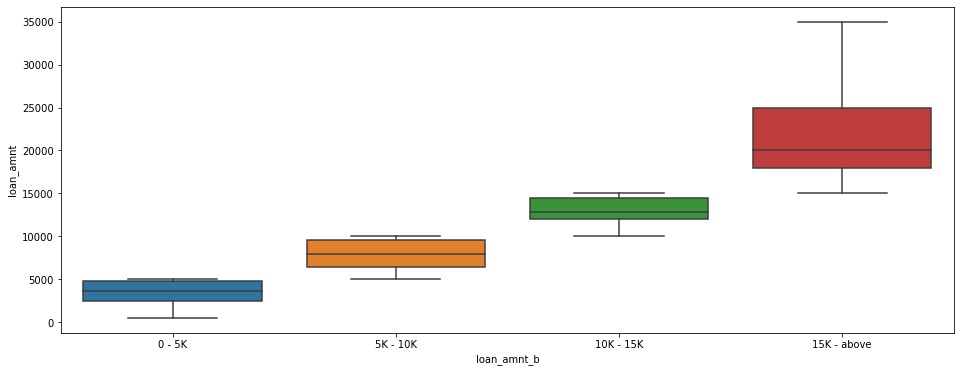

In [74]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.loan_amnt_b)
plot.show()

In [75]:
loan['funded_amnt_inv'].describe()

count    36847.000000
mean     10430.400868
std       7008.919433
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.045000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [80]:
# Creating different bins for Investor Funded Amount
def bucket_funded_amnt_inv(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
loan['funded_amnt_inv_b'] = loan.apply(lambda x : bucket_funded_amnt_inv(x['funded_amnt_inv']), axis = 1)

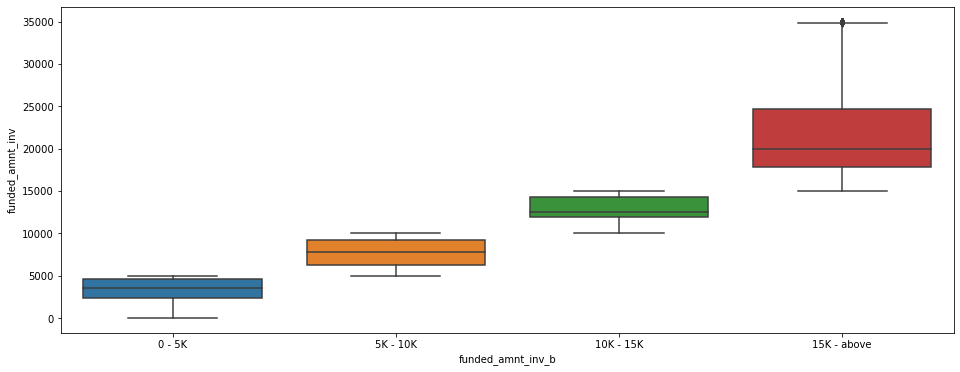

In [81]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.funded_amnt_inv,x=loan.funded_amnt_inv_b)
plot.show()

In [82]:
loan['funded_amnt'].describe()

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [83]:
# Creating different bins for Funded Amount
def bucket_funded_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
loan['funded_amnt_b'] = loan.apply(lambda x : bucket_funded_amnt(x['funded_amnt']), axis = 1)

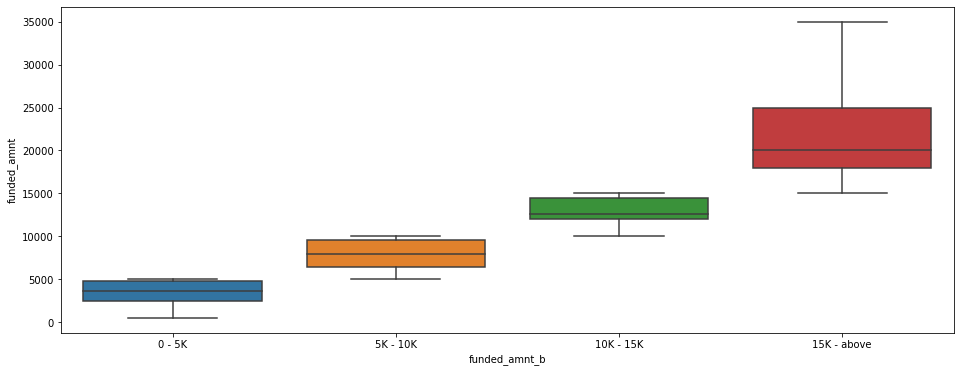

In [84]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.funded_amnt,x=loan.funded_amnt_b)
plot.show()

In [85]:
loan['annual_inc'].describe() / 1000

count      36.847000
mean       69.404482
std        64.027473
min         4.000000
25%        41.004000
50%        60.000000
75%        83.000000
max      6000.000000
Name: annual_inc, dtype: float64

In [86]:
# Different bins for Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'    
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan['annual_inc_b'] = loan.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [87]:
loan['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [88]:
# creating different bins for interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'    
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
loan['int_rate_b'] = loan.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

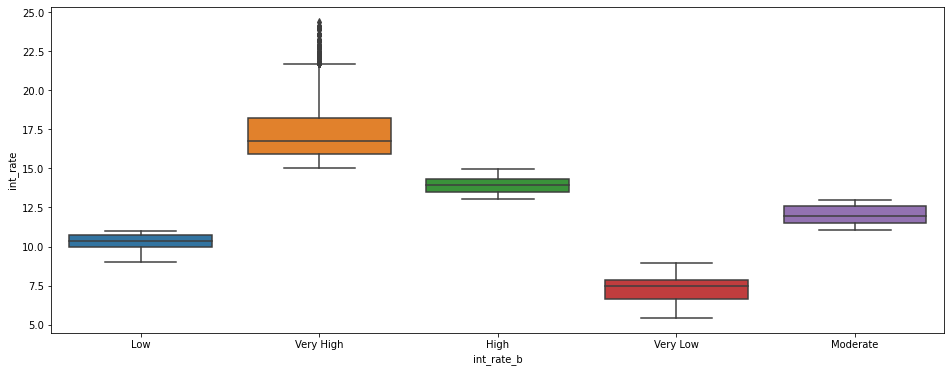

In [89]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.int_rate,x=loan.int_rate_b)
plot.show()

In [90]:
loan['dti'].describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [91]:
# different bins for dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'    
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
loan['dti_b'] = loan.apply(lambda x : bucket_dti(x.dti), axis = 1)

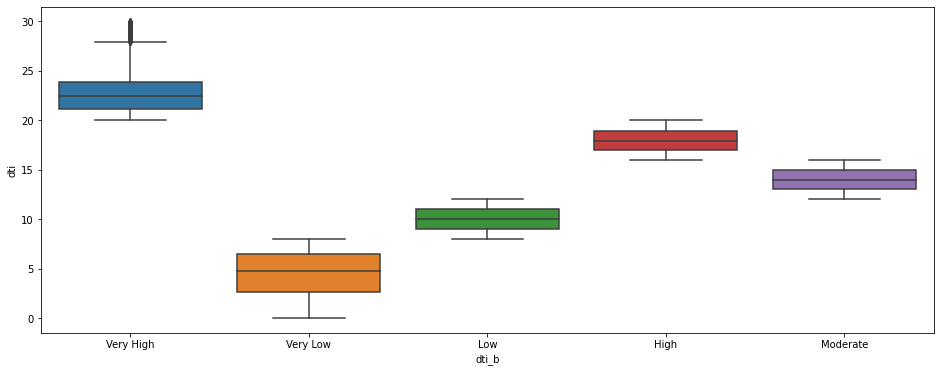

In [92]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.dti,x=loan.dti_b)
plot.show()

### Data Analysis

In [93]:
# finding column info to analyse missing values, empty values in a column
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   loan_amnt             36847 non-null  float64       
 2   funded_amnt           36847 non-null  float64       
 3   funded_amnt_inv       36847 non-null  float64       
 4   term                  36847 non-null  int64         
 5   int_rate              36847 non-null  float64       
 6   installment           36847 non-null  float64       
 7   grade                 36847 non-null  object        
 8   emp_length            36847 non-null  float64       
 9   home_ownership        36847 non-null  object        
 10  annual_inc            36847 non-null  float64       
 11  verification_status   36847 non-null  object        
 12  issue_d               36847 non-null  datetime64[ns]
 13  loan_status     

In [94]:
loan.shape

(36847, 28)

In [95]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y', 'issue_m',
       'issue_q', 'loan_amnt_b', 'funded_amnt_inv_b', 'funded_amnt_b',
       'annual_inc_b', 'int_rate_b', 'dti_b'],
      dtype='object')

## Univeriate Analysis

In [98]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

### Functions to be reused

In [110]:
def column_based_univariate_analysis(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

***

***

## Quantitative Variable Analysis

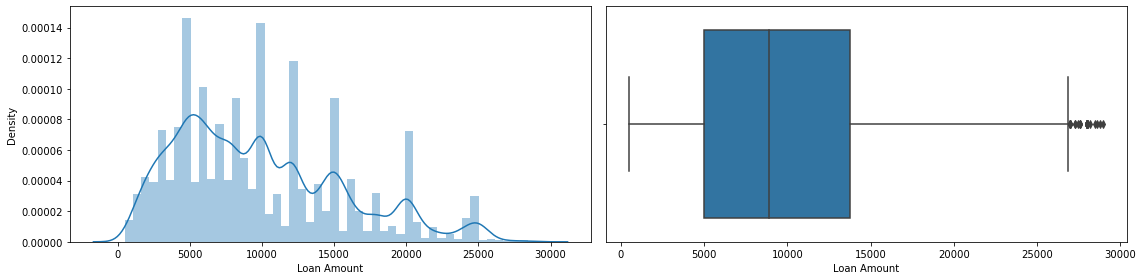

In [119]:
column_based_univariate_analysis(loan, 'loan_amnt')

**Majority of the loan_amount is in the range of 5K to 14K**
***

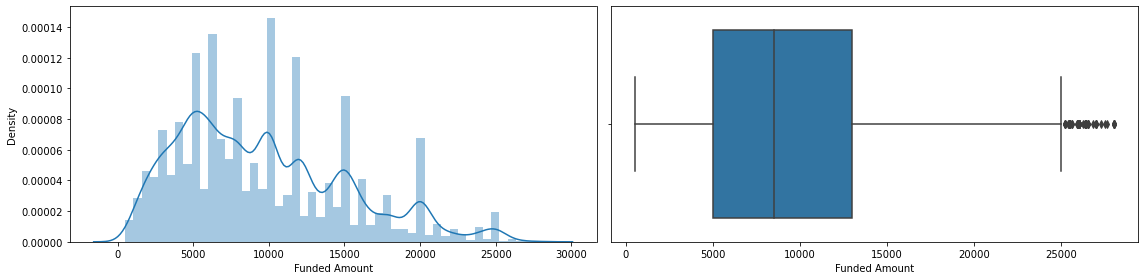

In [120]:
column_based_univariate_analysis(loan, 'funded_amnt')

**Majority of the funded_amnt is in the range of 5K to 13K**
***

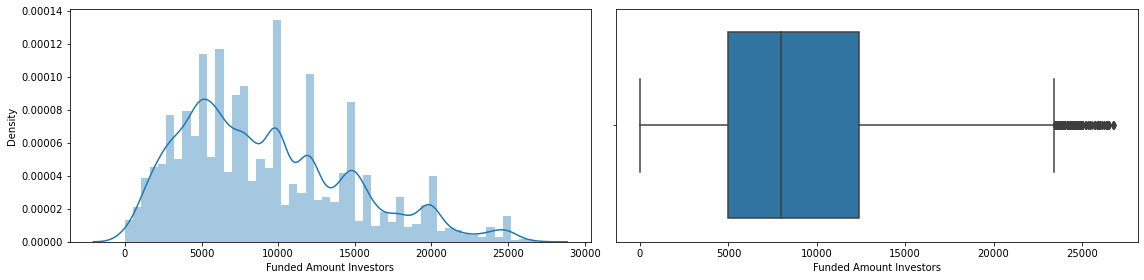

In [121]:
column_based_univariate_analysis(loan, 'funded_amnt_inv')

**Majority of the funded_amnt_inv is in the range of 5K to 12K**
***

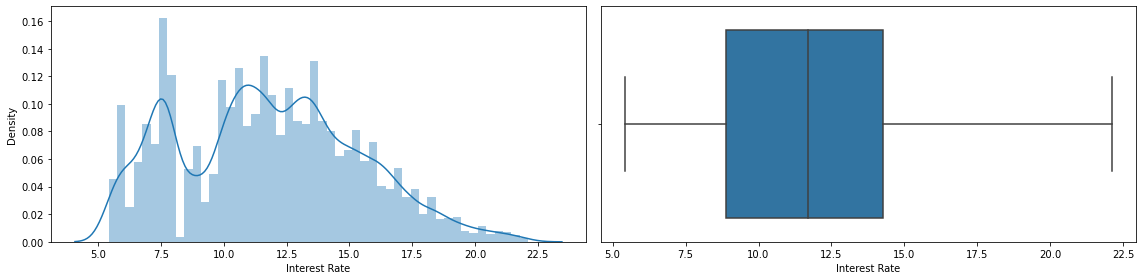

In [115]:
column_based_univariate_analysis(loan, 'int_rate')

**Majority of the interest rate is in the range of 5% to 16% going at the max to 22%**
***

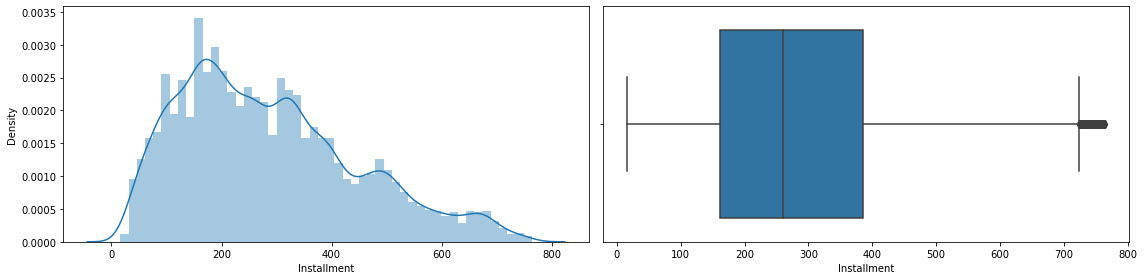

In [116]:
column_based_univariate_analysis(loan, 'installment')

**Majority of the installment is in the range of 20 to 400 going at the max to 700**
***

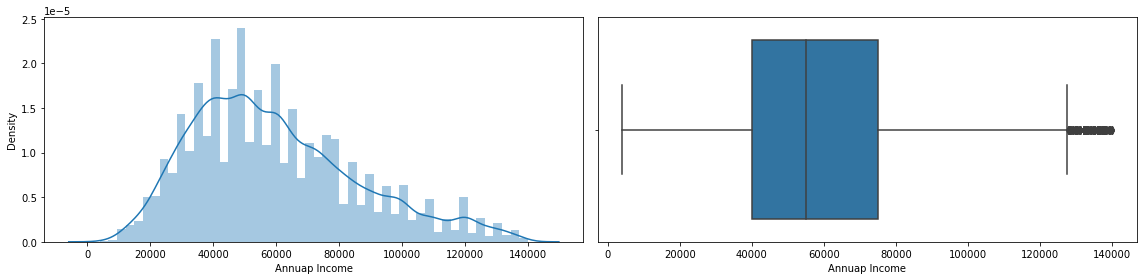

In [117]:
column_based_univariate_analysis(loan, 'annual_inc')

**Majority of the annual income is in the range of 4k to 40k going at the max to 120k**. This column required major outlier treatment.
***

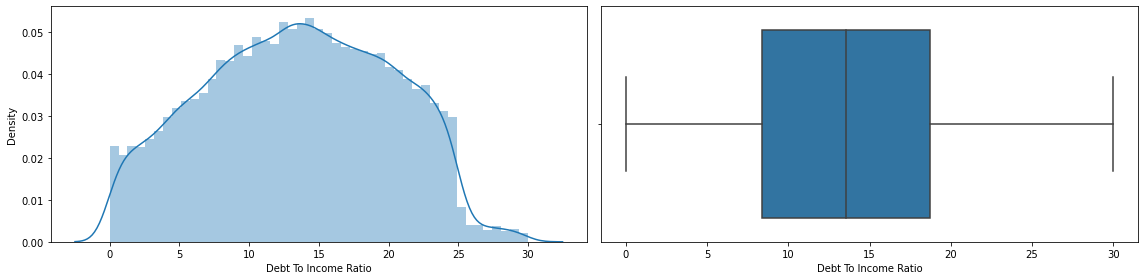

In [126]:
column_based_univariate_analysis(loan, 'dti')

**Majority of the debt to income is in the range of 0 to 20 going at the max to 30**
***

## Unordered Categorical Variable Analysis

<AxesSubplot:>

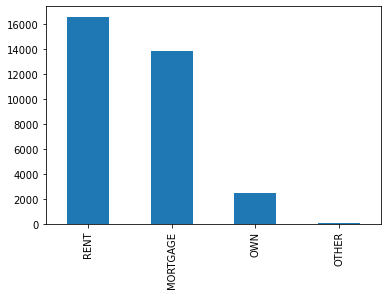

In [127]:
loan['home_ownership'].value_counts().plot.bar()

**Majority of the home owner status are in status of RENT and MORTGAGE**

<AxesSubplot:>

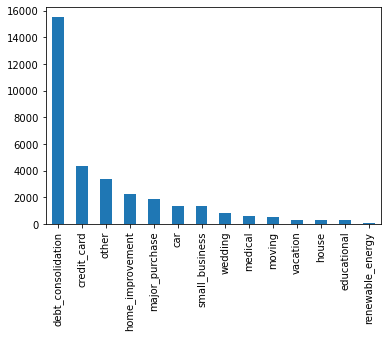

In [128]:
loan['purpose'].value_counts().plot.bar()

Majority of loan application are in the category of debt_consolidation

<AxesSubplot:>

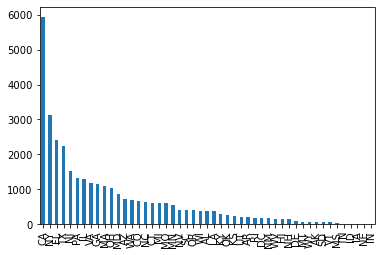

In [129]:
loan['addr_state'].value_counts().plot.bar()

CA state has the maximum amount of loan applications

## Ordered Categorical Variable Analysis

<AxesSubplot:>

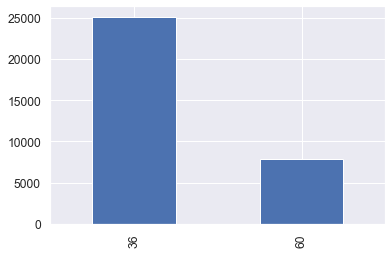

In [1040]:
loan['term'].value_counts().plot.bar()

Majority of the loan applications counts are in the term of 36 months.

<AxesSubplot:>

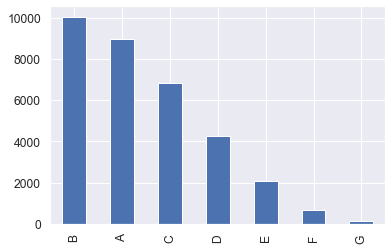

In [1041]:
loan['grade'].value_counts().plot.bar()

Majority of loan application counts fall under the catogory of **Grade B**

<AxesSubplot:>

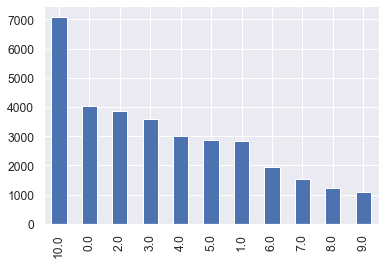

In [1042]:
loan['emp_length'].value_counts().plot.bar()

**Majority of the employment length of the customers are 10+ years and then in the range of 0-2 years**

<AxesSubplot:>

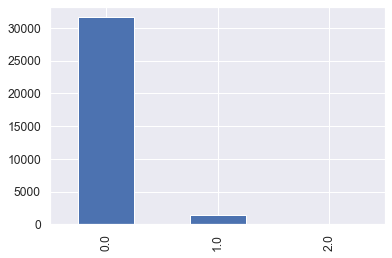

In [1043]:
loan['pub_rec_bankruptcies'].value_counts().plot.bar()

Majority of the loan applicants are in the category of not having an public record of bankruptcies

<AxesSubplot:>

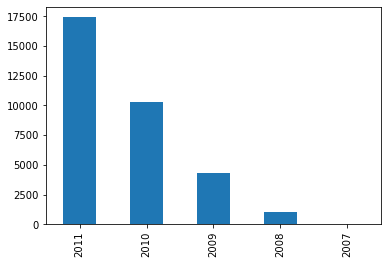

In [125]:
loan['issue_y'].value_counts().plot.bar()

Loan application counts are increasing year over year. 
Maybe the risk exposure is increasing over the year (un proven hypothesis)

<AxesSubplot:>

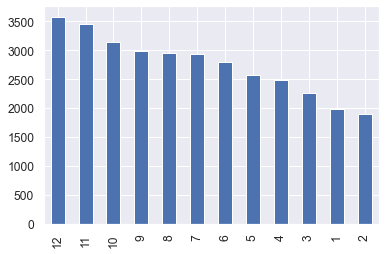

In [1045]:
loan['issue_m'].value_counts().plot.bar()

The lowest loans applocation count are in the month of Jan/Feb/March and highest counts are in 10/11/12. 
 - Possibly because by year ends people face the financial challenges
 - Possibly because of festive seasons
 - Possibly because they are consolidating debt by year end


<AxesSubplot:>

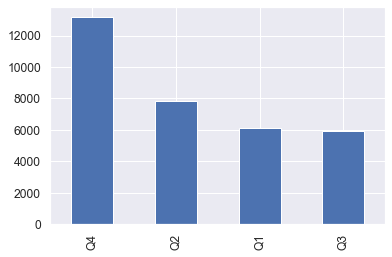

In [1046]:
loan['issue_q'].value_counts().plot.bar()

Highest loan application volume in Quarter 4 of a year

<AxesSubplot:>

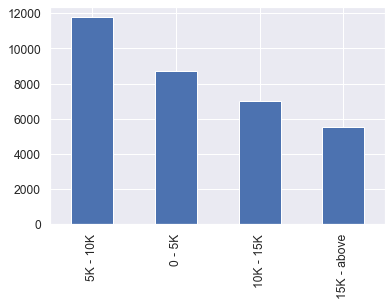

In [1047]:
loan['loan_amnt_b'].value_counts().plot.bar()

Highest loan amount applications fall in the range of 5k to 10k

<AxesSubplot:>

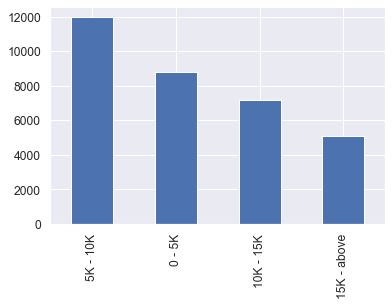

In [1048]:
loan['funded_amnt_b'].value_counts().plot.bar()

Highest funded amount applications fall in the range of 5k to 10k

<AxesSubplot:>

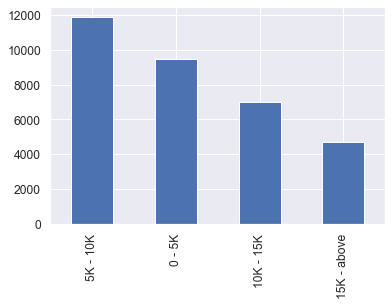

In [1049]:
loan['funded_amnt_inv_b'].value_counts().plot.bar()

Highest loan amount applications fall in the range of 5k to 10k

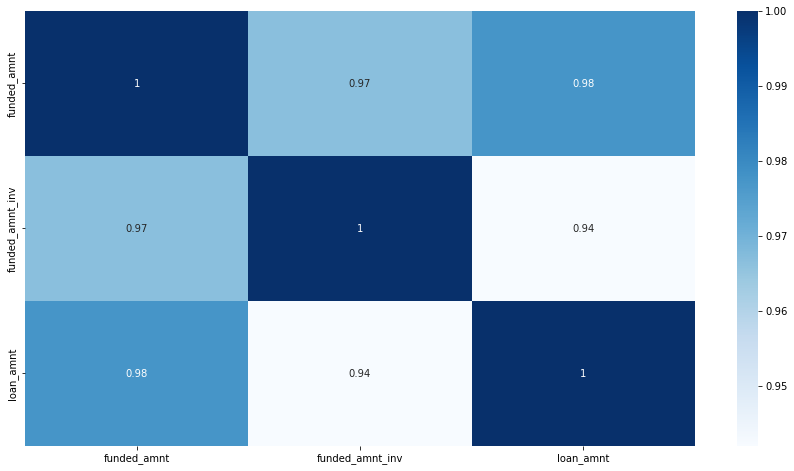

In [124]:
# analysing correlations
corr = loan.loc[:, [ 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']].corr()
plot.figure(figsize = (15,8))
sea.heatmap(corr, annot = True, cmap='Blues')
plot.show()

The loan_amt, funded_amt and funded_amt_inv may is highly positively correlated. dropping ```funded_amnt_inv``` and ```funded_amnt```

In [1051]:
 # Dropping funded_amnt and funded_amnt_inv
loan = loan.drop(['funded_amnt_inv', 'funded_amnt'],  axis=1)

<AxesSubplot:>

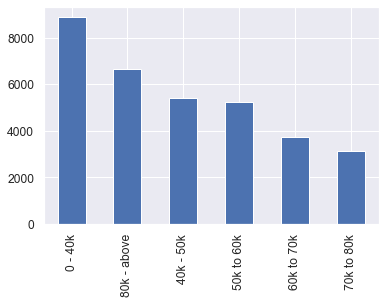

In [1052]:
loan['annual_inc_b'].value_counts().plot.bar()

Majority of the loan applocants are in the range of 0 - 40K anual income

<AxesSubplot:>

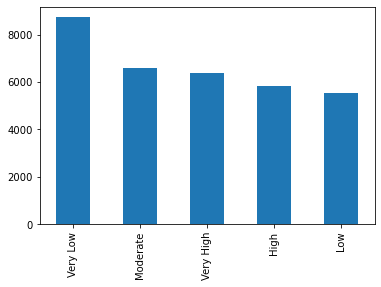

In [130]:
loan['int_rate_b'].value_counts().plot.bar()

Majority of the loan applocations are in the category of Very Low interest rates

<AxesSubplot:>

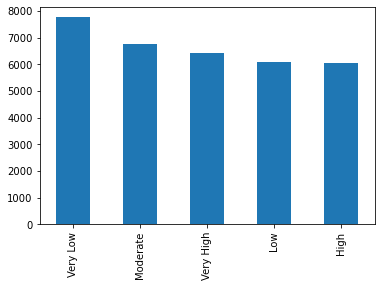

In [131]:
loan['dti_b'].value_counts().plot.bar()

Majority of the loan applications are in Moderate debt to income ratio

## Univariate Analysis Summary

In [1055]:
# Printing column info to analyse missing values, empty values in a column
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33056 entries, 0 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    33056 non-null  int64         
 1   loan_amnt             33056 non-null  float64       
 2   term                  33056 non-null  int64         
 3   int_rate              33056 non-null  float64       
 4   installment           33056 non-null  float64       
 5   grade                 33056 non-null  object        
 6   emp_length            33056 non-null  float64       
 7   home_ownership        33056 non-null  object        
 8   annual_inc            33056 non-null  float64       
 9   verification_status   33056 non-null  object        
 10  issue_d               33056 non-null  datetime64[ns]
 11  loan_status           33056 non-null  object        
 12  purpose               33056 non-null  object        
 13  zip_code        

In [132]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,pub_rec_bankruptcies,issue_y,issue_m,issue_q,loan_amnt_b,funded_amnt_inv_b,funded_amnt_b,annual_inc_b,int_rate_b,dti_b
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,...,0.0,2011,12,Q4,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Low,Very High
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,0.0,RENT,...,0.0,2011,12,Q4,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Very High,Very Low
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,...,0.0,2011,12,Q4,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Very High,Low
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,...,0.0,2011,12,Q4,5K - 10K,5K - 10K,5K - 10K,40k - 50k,High,High
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,...,0.0,2011,12,Q4,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Very Low,Low


***

## Bivariate Analysis against Loan Status to understand how different feature has impact on loan_status column

In [253]:
def loan_status_ratio_wise_plot(df, column, invert=False):
    plot.figure(figsize=[20,8])
    plot.title('Charged Off : ' + column_titles[column])
    rw = ratio_wise(df, column)
    if invert:
        sea.barplot(rw['charge_off_ratio'], rw[column])
    else:
        sea.barplot(rw[column], rw['charge_off_ratio'])
    plot.tight_layout()
    plot.show()
    return rw

def loan_Status_series_plot(df, column, hue=None, annot=1):
        temp = pd.Series()
        fig, ax = plot.subplots(figsize=(20,14))
        width = len(df[column].unique()) + 6 + 4 * len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sea.countplot(data = df, x=column, order=df[column].value_counts().index, hue=hue) 
        if annot == 1:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        elif annot == 2:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
        plot.show()

### Analysis vs Charged Off Status

Impact of Charge Off's on loan status 

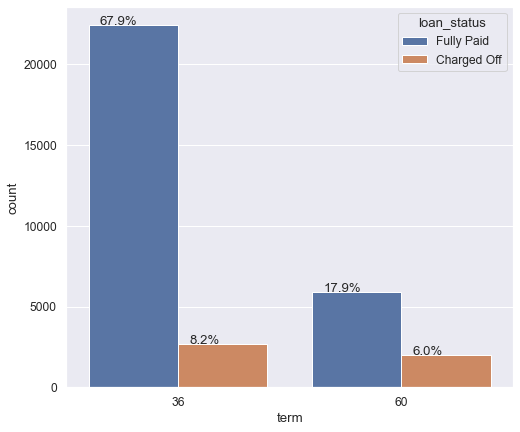

In [295]:
loan_Status_series_plot(loan, 'term', 'loan_status')

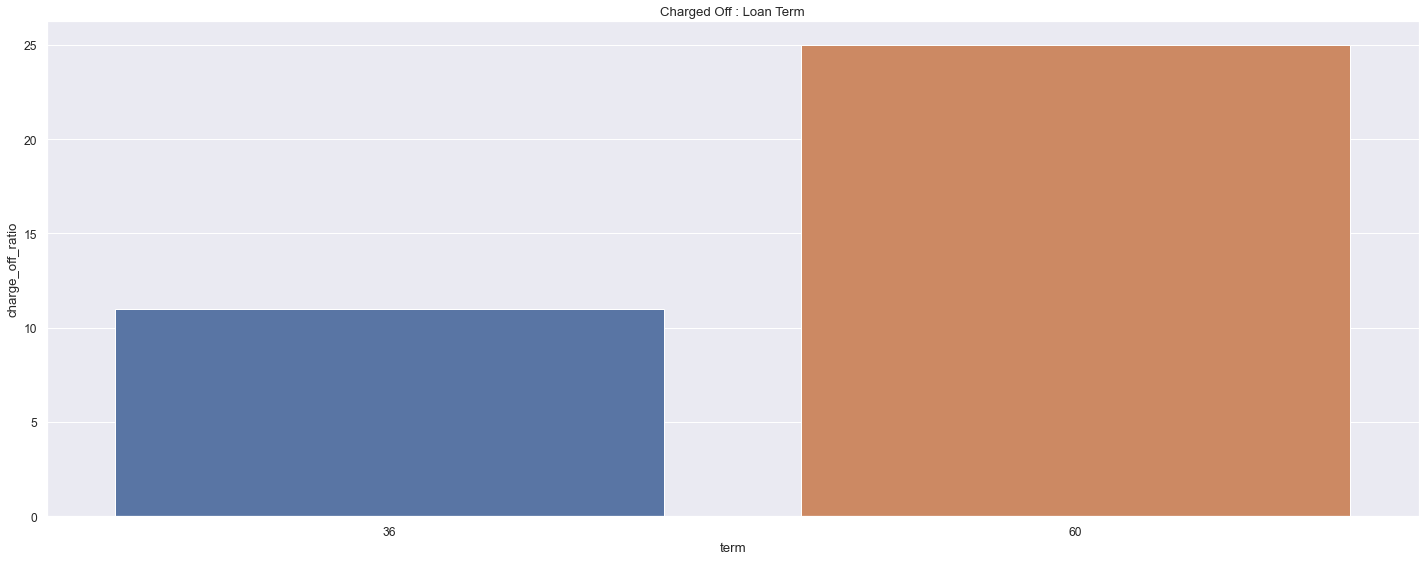

loan_status,term,Charged Off,Fully Paid,total,charge_off_ratio
0,36,2710,22429,25139,11.0
1,60,1990,5927,7917,25.0


In [302]:
#against term
loan_status_ratio_wise_plot(loan, 'term')

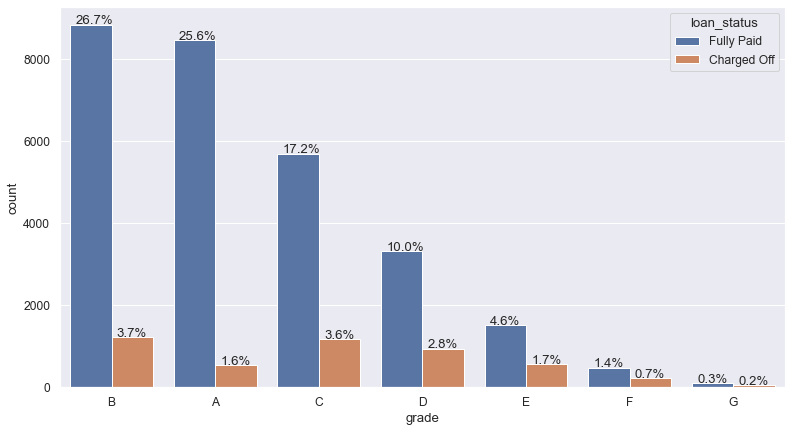

In [311]:
#grade impact on loan status
loan_Status_series_plot(loan, 'grade', 'loan_status')

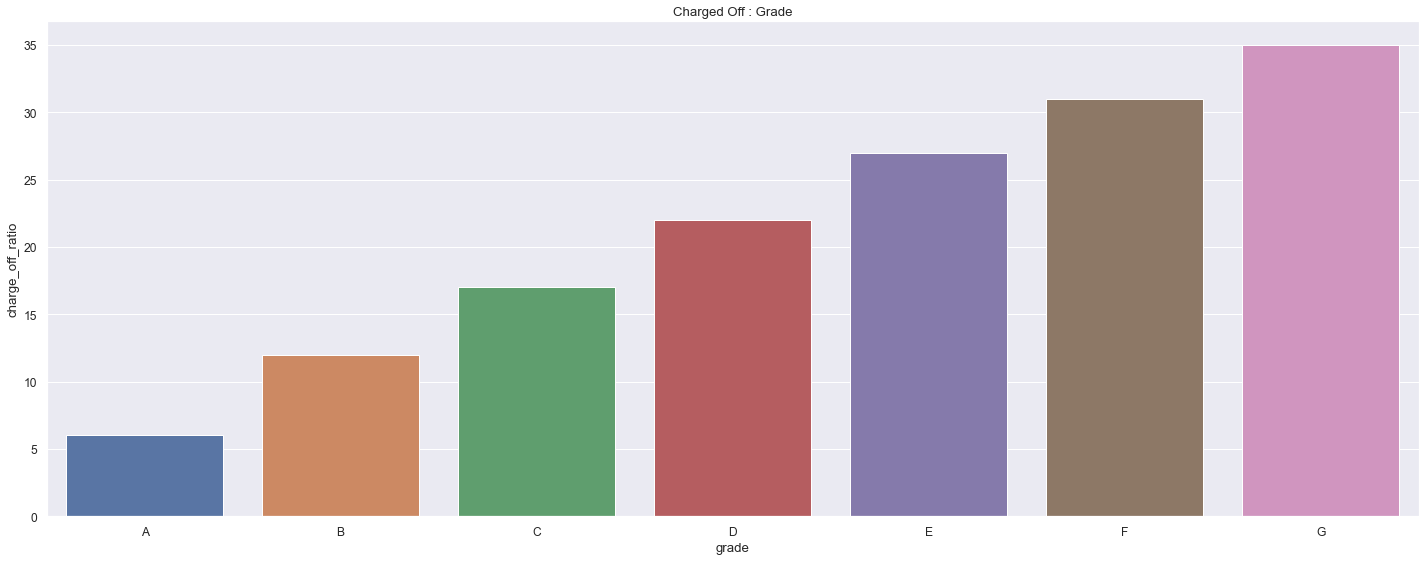

loan_status,grade,Charged Off,Fully Paid,total,charge_off_ratio
0,A,537,8451,8988,6.0
1,B,1222,8821,10043,12.0
2,C,1175,5683,6858,17.0
3,D,937,3316,4253,22.0
4,E,555,1505,2060,27.0
5,F,219,477,696,31.0
6,G,55,103,158,35.0


In [310]:
##grade impact on loan status
loan_status_ratio_wise_plot(loan, 'grade')

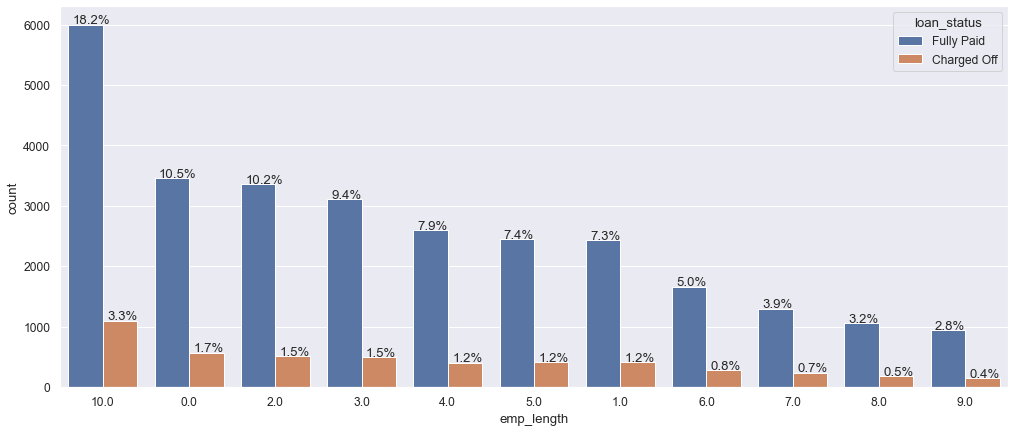

In [309]:
# employement lenght impact on loan status
loan_Status_series_plot(loan, 'emp_length', 'loan_status')

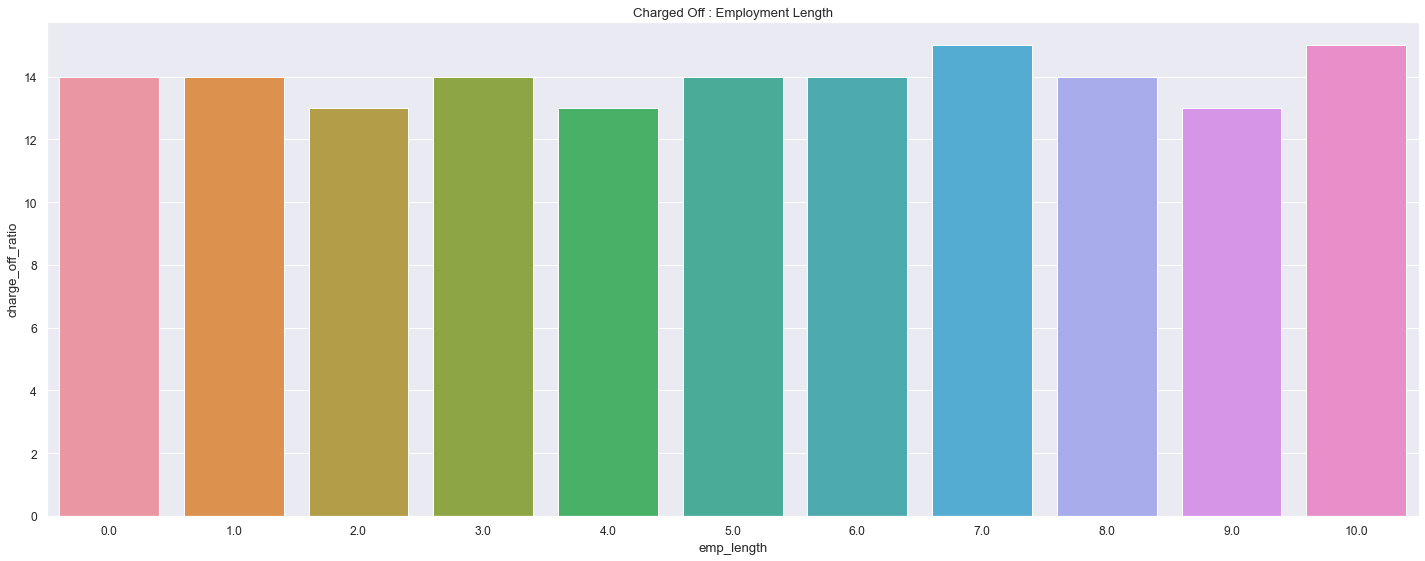

loan_status,emp_length,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,565,3461,4026,14.0
1,1.0,408,2427,2835,14.0
2,2.0,509,3360,3869,13.0
3,3.0,491,3113,3604,14.0
4,4.0,401,2598,2999,13.0
5,5.0,408,2449,2857,14.0
6,6.0,272,1659,1931,14.0
7,7.0,233,1294,1527,15.0
8,8.0,176,1056,1232,14.0
9,9.0,141,936,1077,13.0


In [306]:
##charege off vs employement length
loan_status_ratio_wise_plot(loan, 'emp_length')

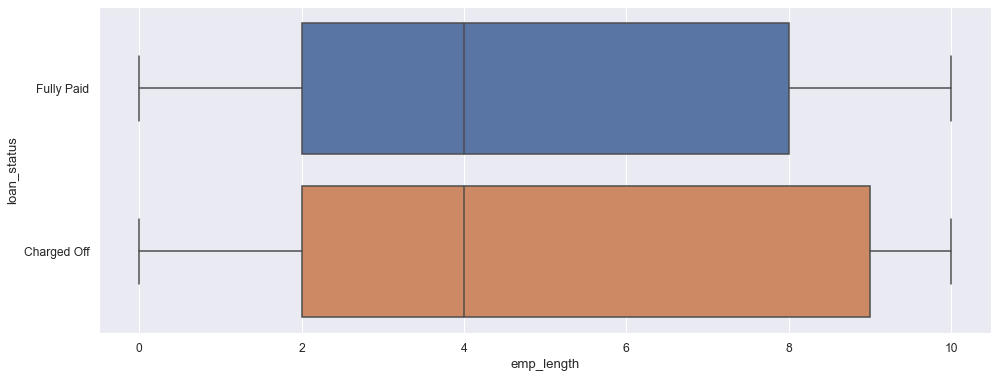

In [307]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_status,x=loan.emp_length)
plot.show()

- Highest Charge Offs are in the employee length categoty of 10 Years and above
- Charge Off ratio within the categories itself are similar and inconclusive


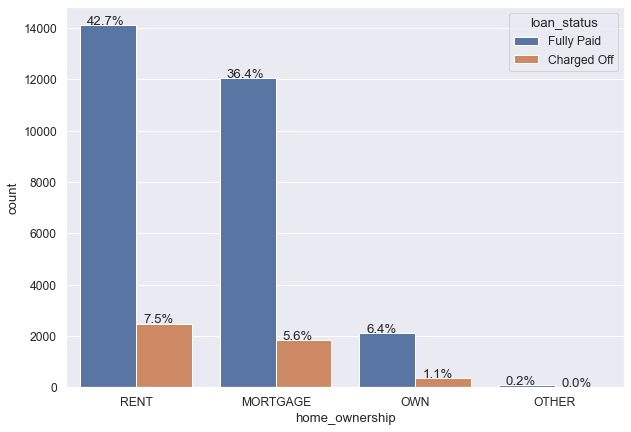

In [308]:
# home owener ship vs loan status
loan_Status_series_plot(loan, 'home_ownership', 'loan_status')

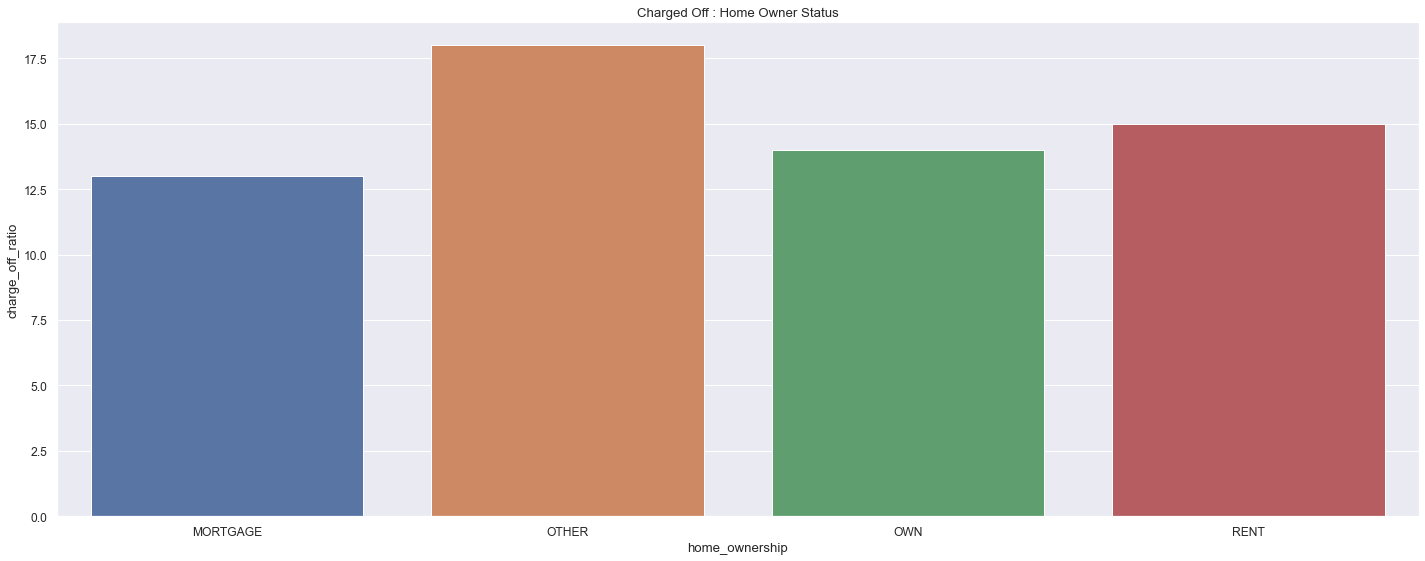

loan_status,home_ownership,Charged Off,Fully Paid,total,charge_off_ratio
0,MORTGAGE,1846,12045,13891,13.0
1,OTHER,16,73,89,18.0
2,OWN,354,2113,2467,14.0
3,RENT,2484,14125,16609,15.0


In [312]:
#how many charge off for different home ownership category
loan_status_ratio_wise_plot(loan, 'home_ownership')

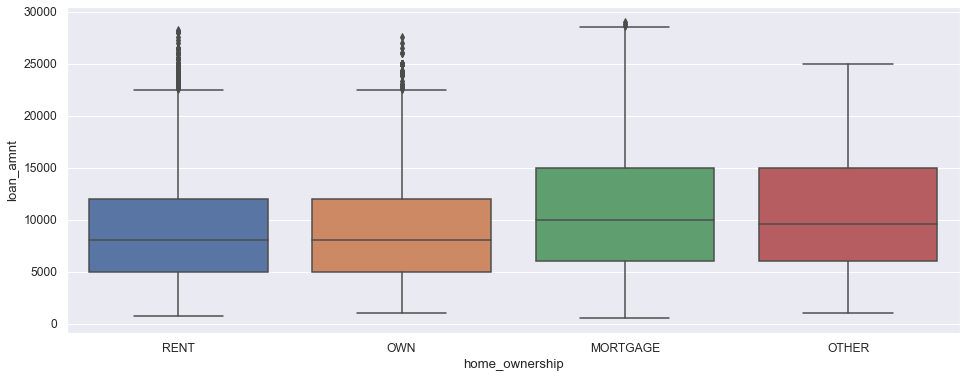

In [313]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.home_ownership)
plot.show()

***
- Overall highest Charge Off numbers are in the category of RENT and MORTGAGE
 
***

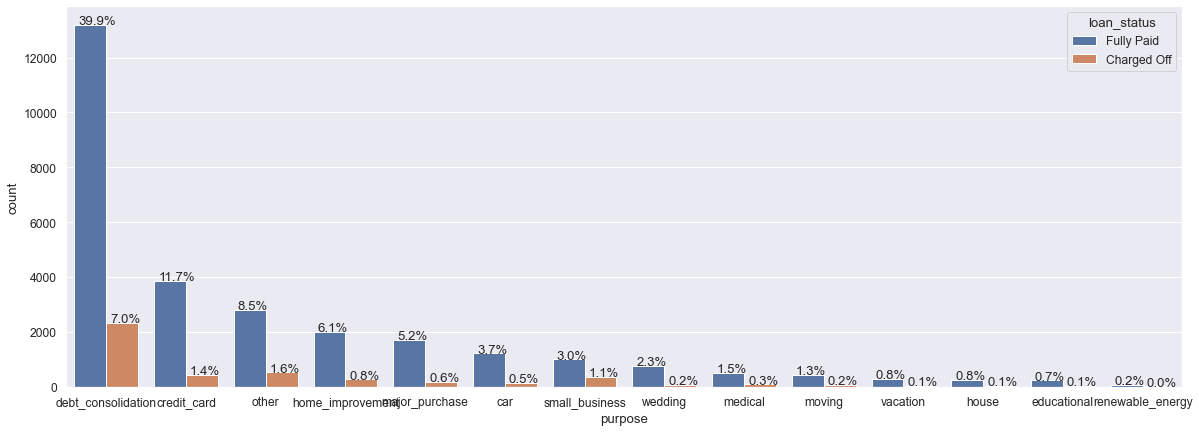

In [314]:
# Impact of loan purpose on loan status
loan_Status_series_plot(loan, 'purpose', 'loan_status')

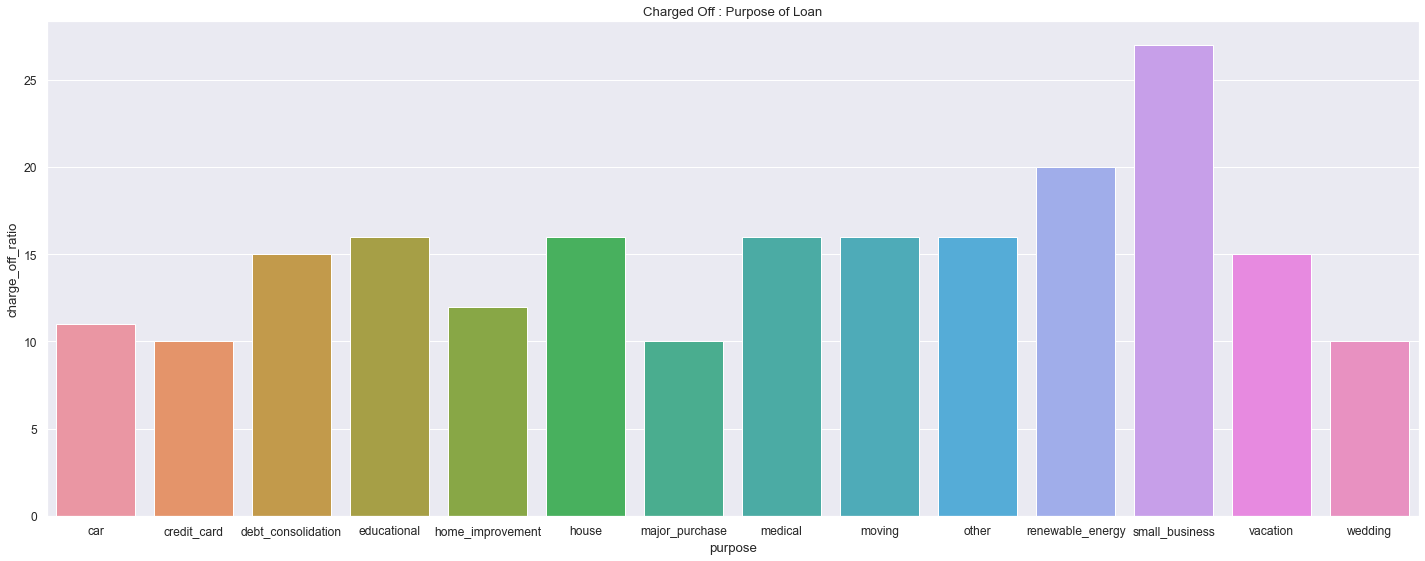

loan_status,purpose,Charged Off,Fully Paid,total,charge_off_ratio
0,car,150,1221,1371,11.0
1,credit_card,448,3868,4316,10.0
2,debt_consolidation,2325,13203,15528,15.0
3,educational,46,235,281,16.0
4,home_improvement,274,2014,2288,12.0
5,house,48,248,296,16.0
6,major_purchase,194,1710,1904,10.0
7,medical,95,509,604,16.0
8,moving,79,428,507,16.0
9,other,531,2818,3349,16.0


In [315]:
## how many defaults against the purpose
loan_status_ratio_wise_plot(loan, 'purpose')

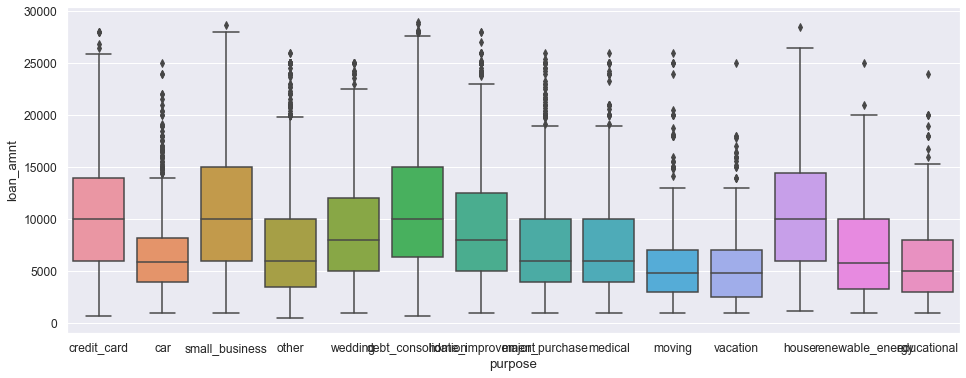

In [316]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.purpose)
plot.show()

***
- Highest risk of Charge Offs are the category of debt_consolidation
***

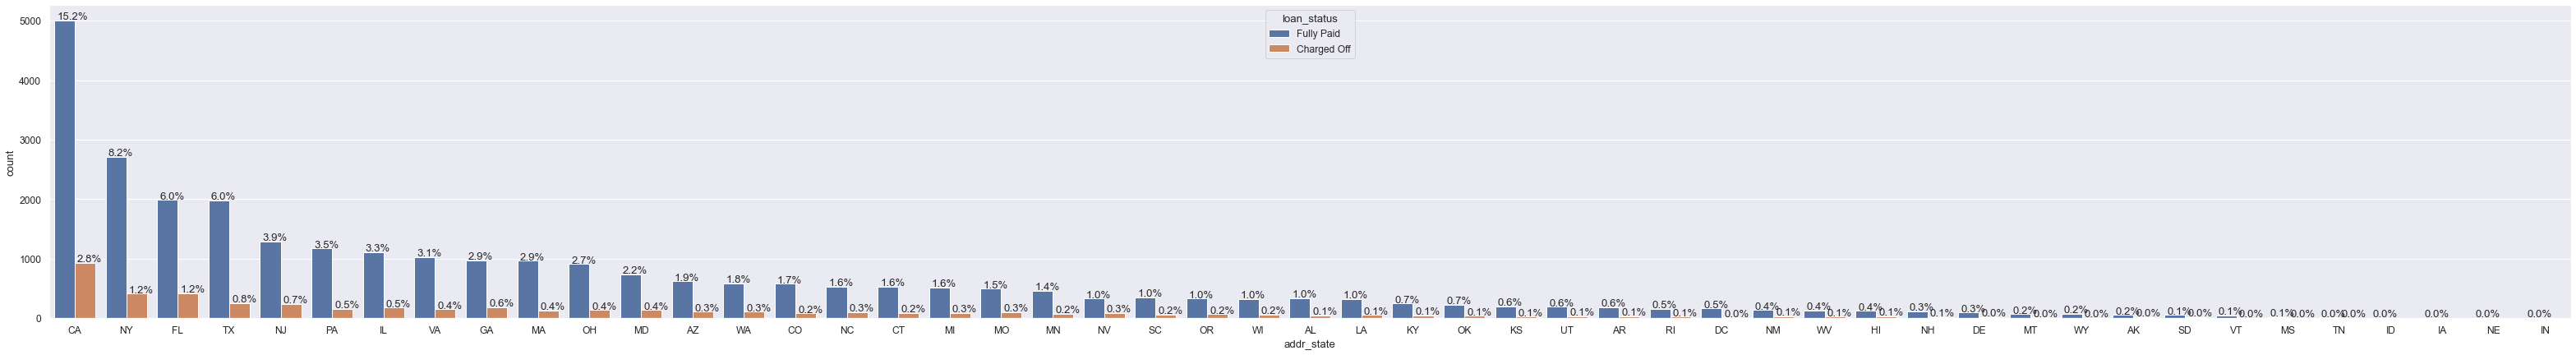

In [317]:
# impact of addr)state agains loan status
loan_Status_series_plot(loan, 'addr_state', 'loan_status')

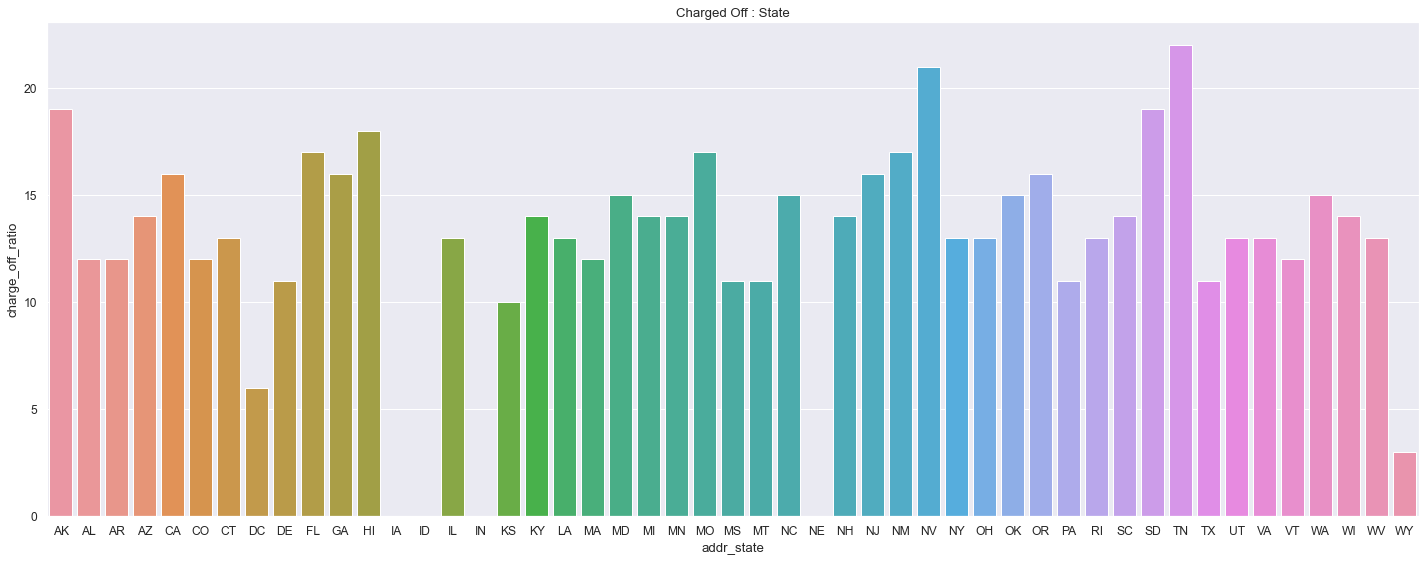

loan_status,addr_state,Charged Off,Fully Paid,total,charge_off_ratio
0,AK,12.0,51.0,63.0,19.0
1,AL,45.0,330.0,375.0,12.0
2,AR,25.0,183.0,208.0,12.0
3,AZ,103.0,618.0,721.0,14.0
4,CA,930.0,5009.0,5939.0,16.0
5,CO,77.0,576.0,653.0,12.0
6,CT,80.0,526.0,606.0,13.0
7,DC,10.0,162.0,172.0,6.0
8,DE,11.0,90.0,101.0,11.0
9,FL,413.0,1984.0,2397.0,17.0


In [318]:
loan_status_ratio_wise_plot(loan, 'addr_state')

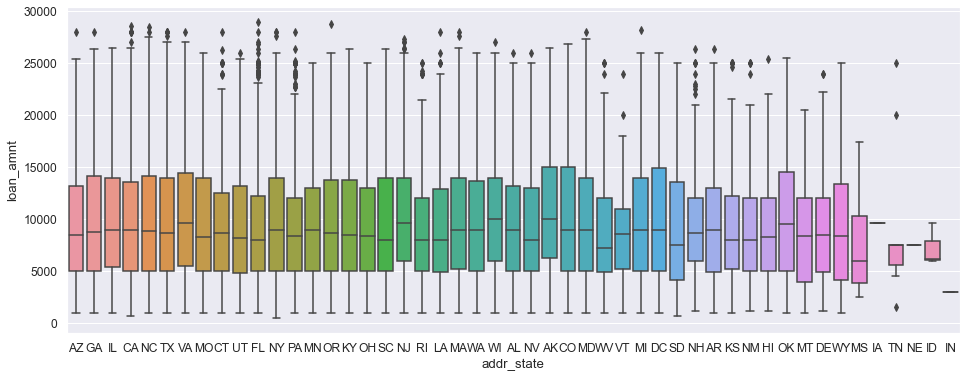

In [319]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.addr_state)
plot.show()

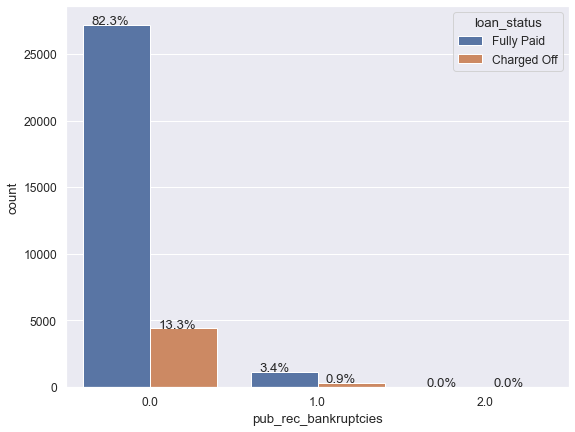

In [320]:
#impact of public bankruptcies records on loan status
loan_Status_series_plot(loan, 'pub_rec_bankruptcies', 'loan_status')

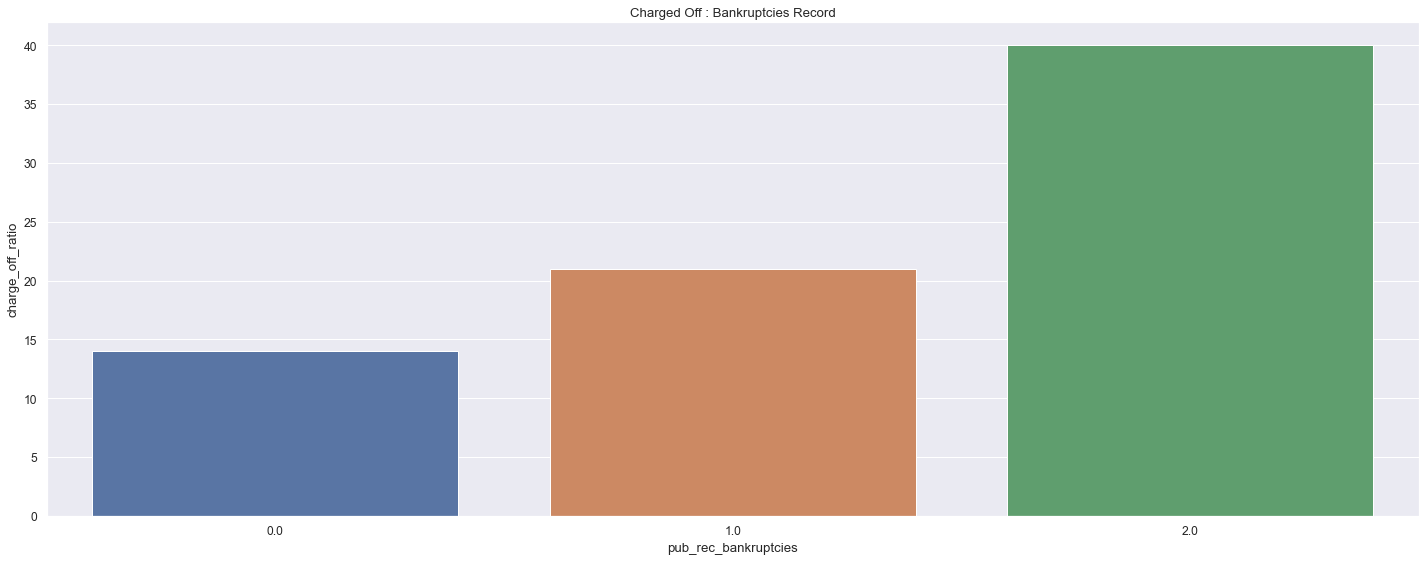

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,4390,27216,31606,14.0
1,1.0,308,1137,1445,21.0
2,2.0,2,3,5,40.0


In [321]:

loan_status_ratio_wise_plot(loan, 'pub_rec_bankruptcies')

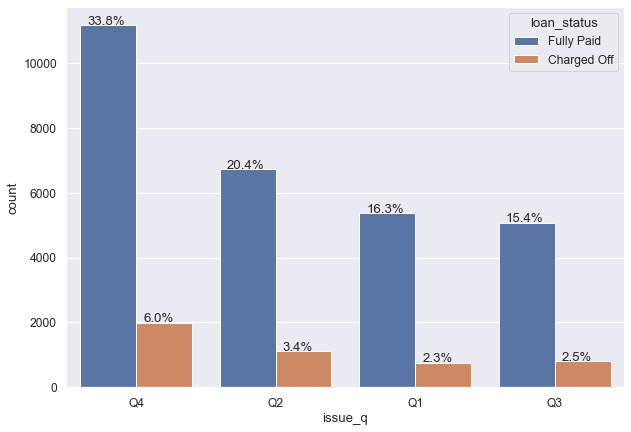

In [322]:
# issue_q impact on loan status
loan_Status_series_plot(loan, 'issue_q', 'loan_status')

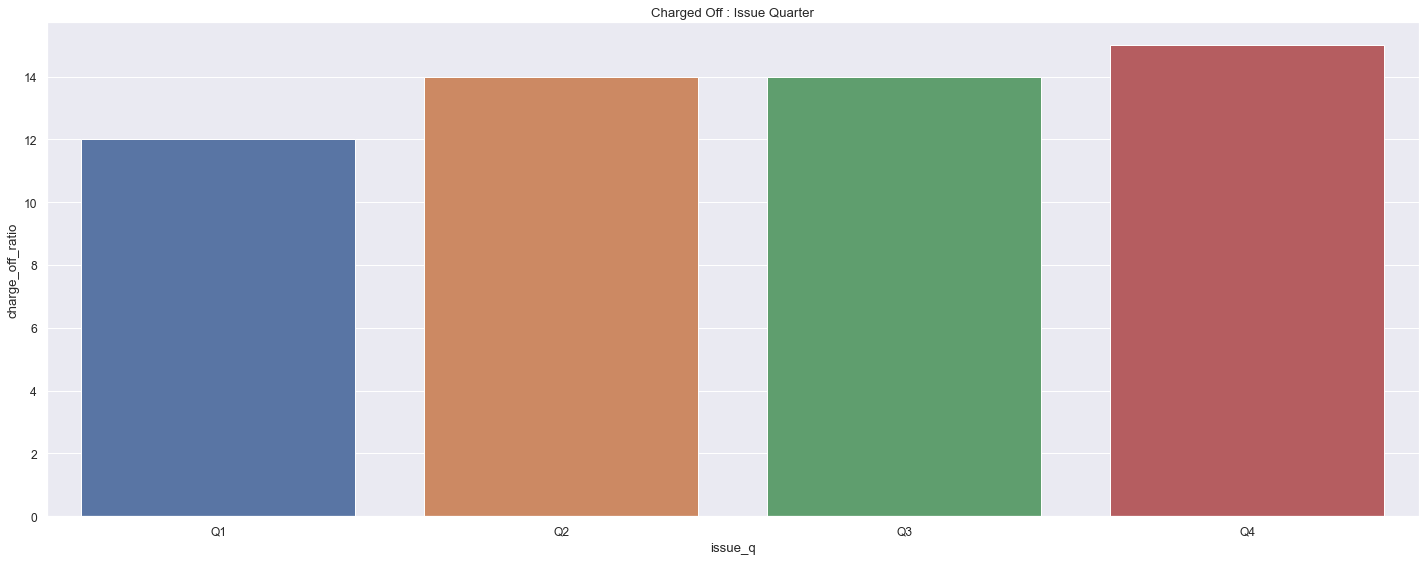

loan_status,issue_q,Charged Off,Fully Paid,total,charge_off_ratio
0,Q1,761,5376,6137,12.0
1,Q2,1124,6728,7852,14.0
2,Q3,818,5078,5896,14.0
3,Q4,1997,11174,13171,15.0


In [323]:
loan_status_ratio_wise_plot(loan, 'issue_q')

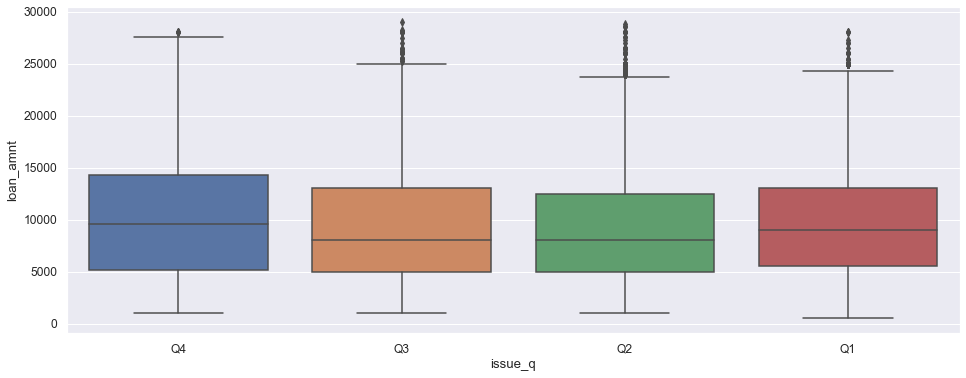

In [324]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.issue_q)
plot.show()

### Annual Income Bucket (annual_inc_b)

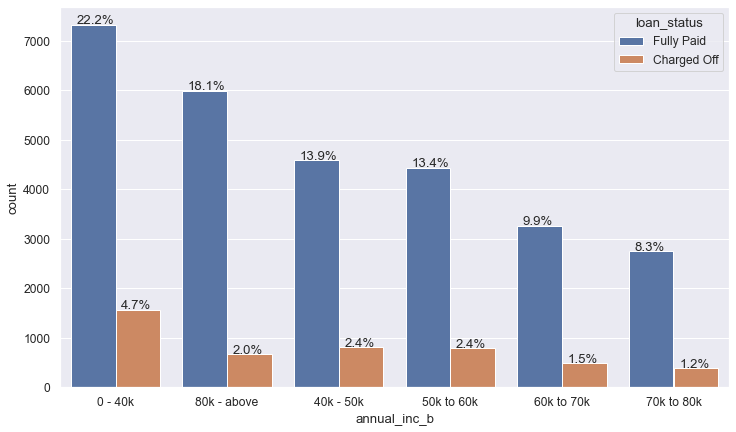

In [325]:
# impact of annual income on loan status
loan_Status_series_plot(loan, 'annual_inc_b', 'loan_status')

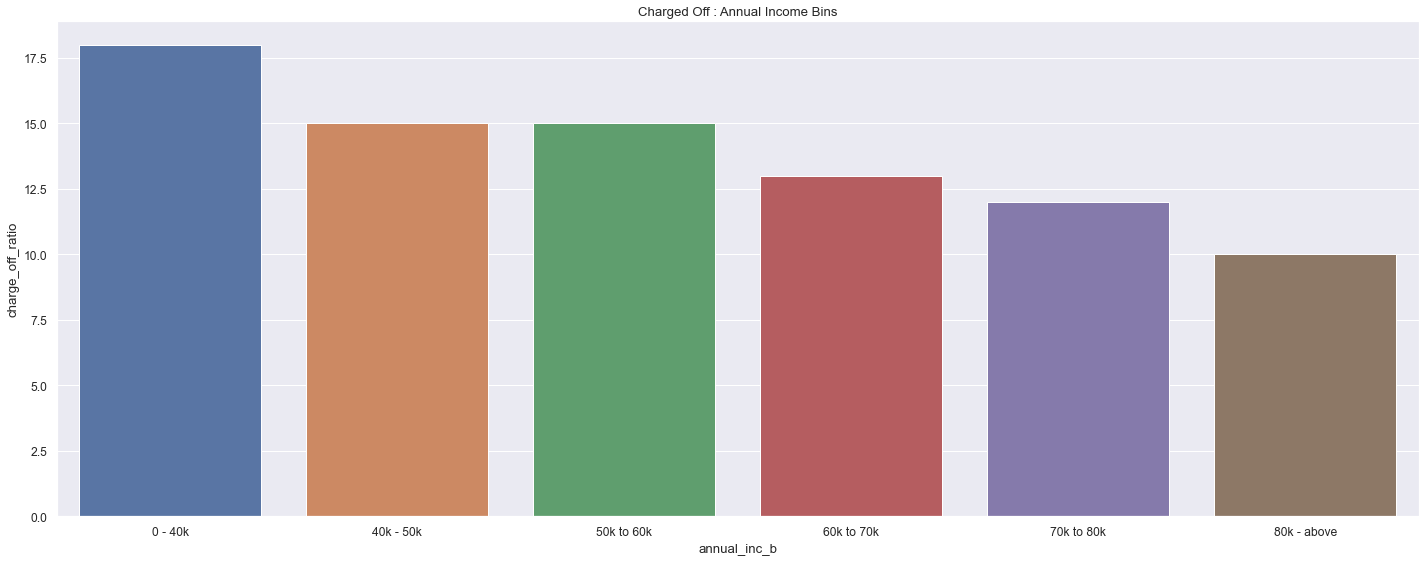

loan_status,annual_inc_b,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 40k,1570,7326,8896,18.0
1,40k - 50k,807,4593,5400,15.0
2,50k to 60k,788,4435,5223,15.0
3,60k to 70k,486,3261,3747,13.0
4,70k to 80k,385,2749,3134,12.0
5,80k - above,664,5992,6656,10.0


In [326]:

loan_status_ratio_wise_plot(loan, 'annual_inc_b')

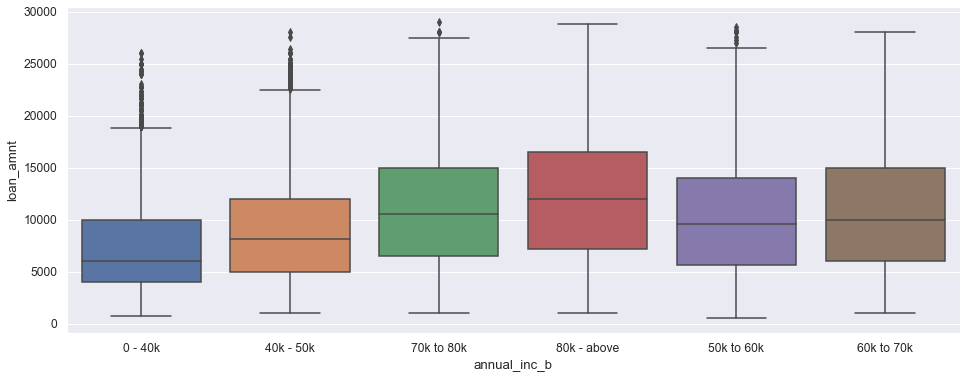

In [327]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.annual_inc_b)
plot.show()

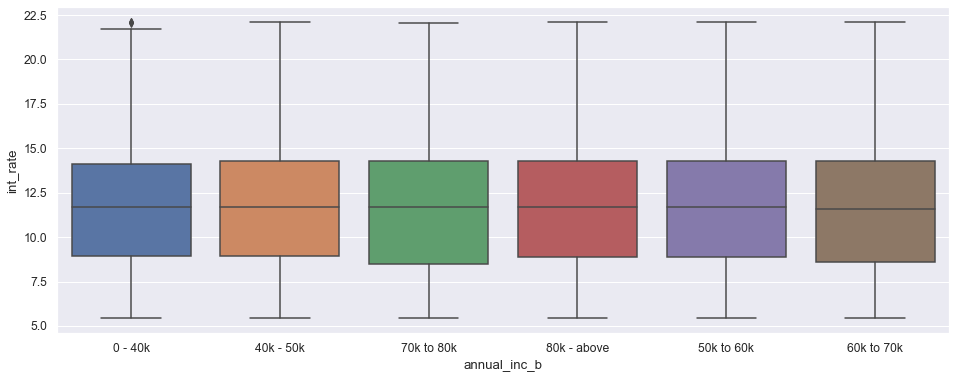

In [328]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.int_rate,x=loan.annual_inc_b)
plot.show()

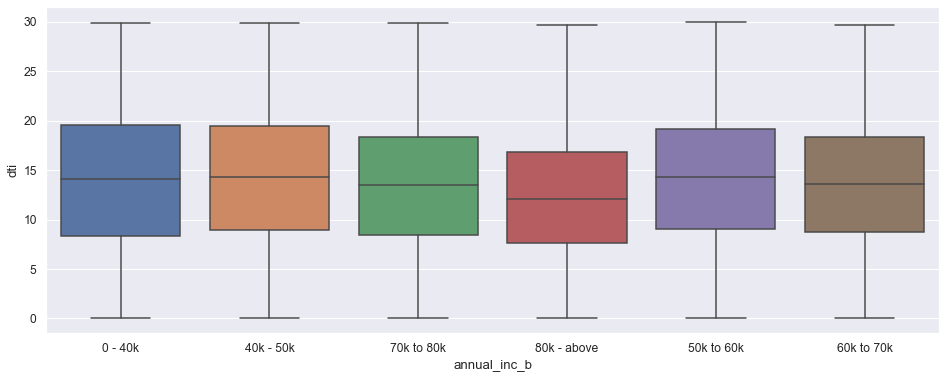

In [329]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.dti,x=loan.annual_inc_b)
plot.show()


    - Income range of 0-40K have more chances of defaults
    - Income range 80000+  reduces the default risk.
    - Increase in annual income makes more likely for loan completion. 


### Loan Amount Bucket (loan_amnt_b)

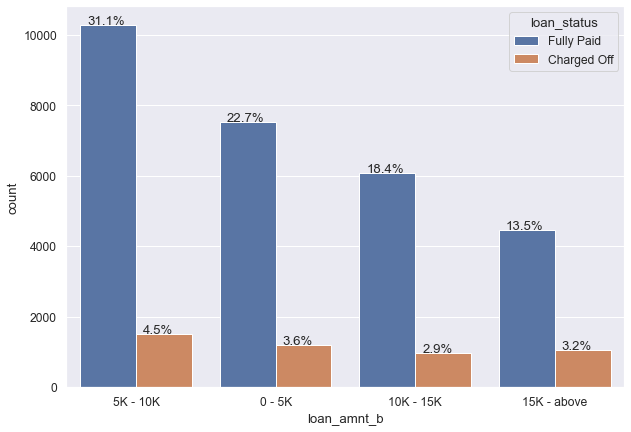

In [330]:
# impact of loan amount on loan status
loan_Status_series_plot(loan, 'loan_amnt_b', 'loan_status')

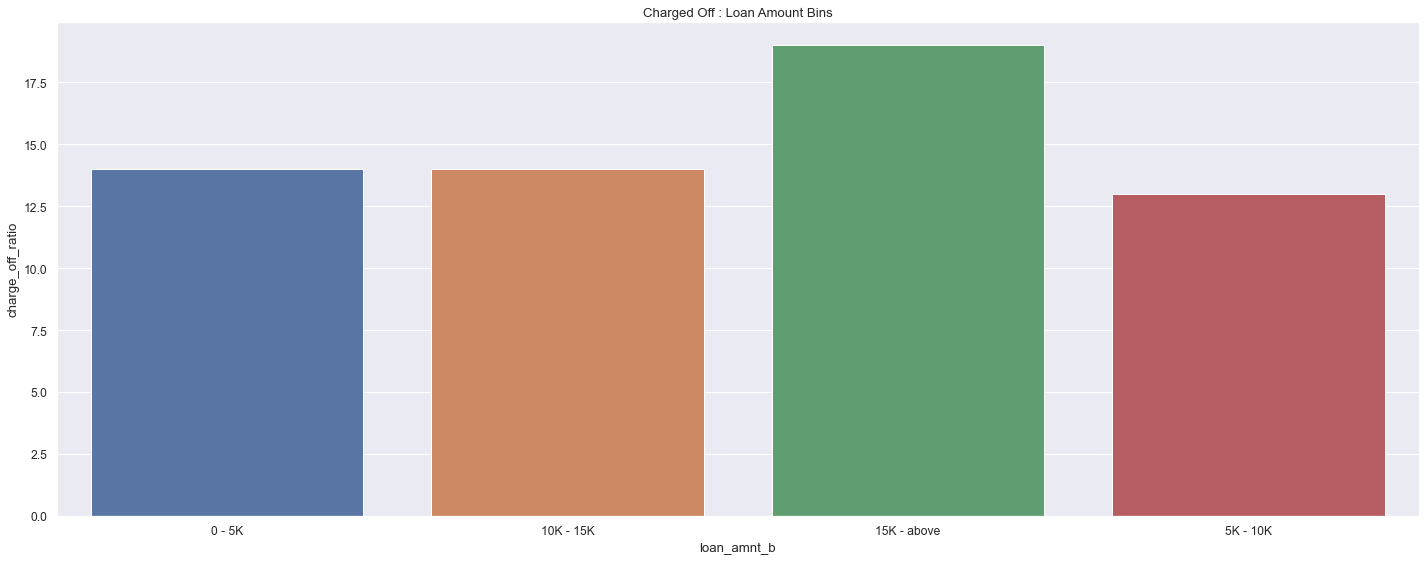

loan_status,loan_amnt_b,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 5K,1180,7520,8700,14.0
1,10K - 15K,954,6077,7031,14.0
2,15K - above,1063,4466,5529,19.0
3,5K - 10K,1503,10293,11796,13.0


In [331]:
loan_status_ratio_wise_plot(loan, 'loan_amnt_b')

***
    - if loan amount 15K and above then it has high risk of defaulting
***

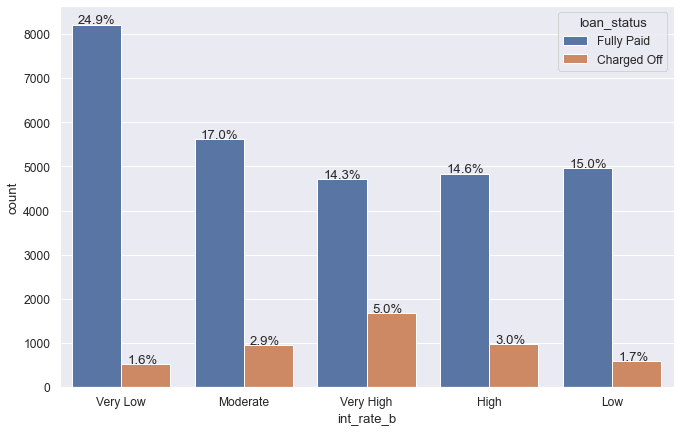

In [345]:
# impact of interest on loan status
loan_Status_series_plot(loan, 'int_rate_b', 'loan_status')

### Interest Rate categories (int_rate_b)

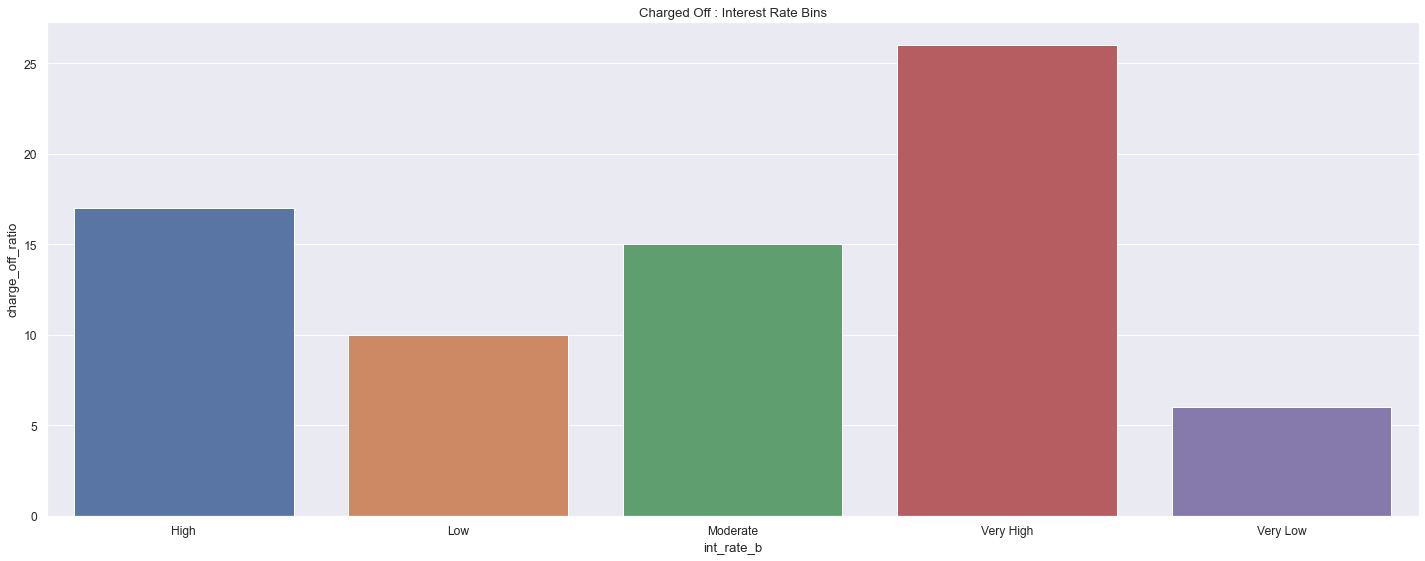

loan_status,int_rate_b,Charged Off,Fully Paid,total,charge_off_ratio
0,High,981,4837,5818,17.0
1,Low,578,4964,5542,10.0
2,Moderate,958,5618,6576,15.0
3,Very High,1665,4721,6386,26.0
4,Very Low,518,8216,8734,6.0


In [333]:
loan_status_ratio_wise_plot(loan, 'int_rate_b')

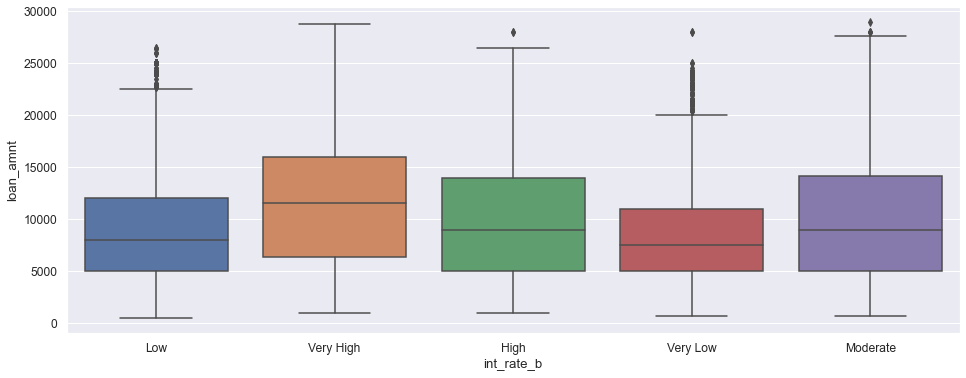

In [334]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.int_rate_b)
plot.show()

***
- Default risk increases with High interest
***

### Correlation Analysis

In [335]:
corr_loan = loan

In [336]:
# Printing column info to analyse missing values, empty values in a column
print(corr_loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33056 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    33056 non-null  int64         
 1   loan_amnt             33056 non-null  float64       
 2   funded_amnt           33056 non-null  float64       
 3   funded_amnt_inv       33056 non-null  float64       
 4   term                  33056 non-null  int64         
 5   int_rate              33056 non-null  float64       
 6   installment           33056 non-null  float64       
 7   grade                 33056 non-null  object        
 8   emp_length            33056 non-null  float64       
 9   home_ownership        33056 non-null  object        
 10  annual_inc            33056 non-null  float64       
 11  verification_status   33056 non-null  object        
 12  issue_d               33056 non-null  datetime64[ns]
 13  loan_status     

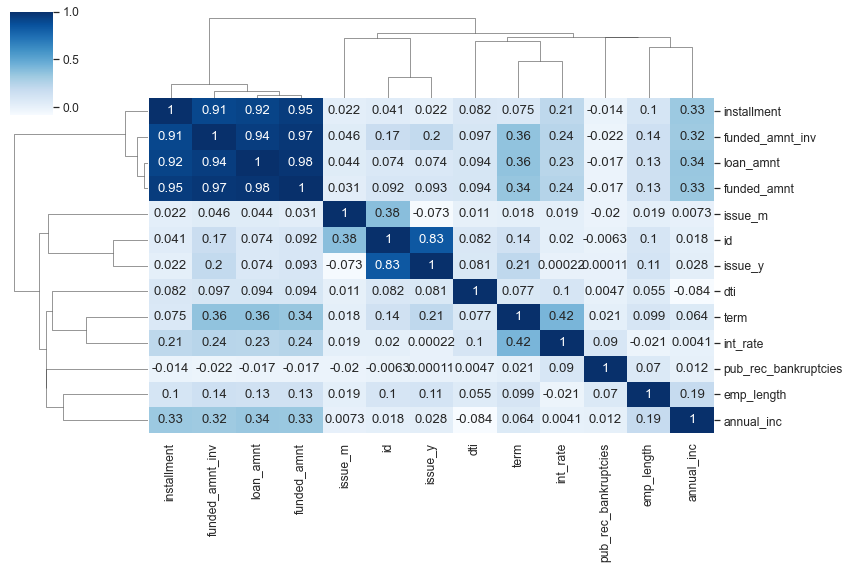

In [337]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [338]:
# Data-Cleanning
# Dropping loan amount redundant fields
# Dropping fields id which are not impacting the analysis
# Dropping fields issue_y and issue_m
drop_columns = ['installment', 'id', 'issue_y', 'issue_m']
corr_loan = corr_loan.drop(columns=drop_columns)

### Bivariate Analysis Summary